In [512]:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [513]:
dataset = pd.read_csv('50_Startups.csv')

# Let's find the Correlation

In [514]:
c = dataset.corr()
c

,R&D Spend,Administration,Marketing Spend,Profit
R&D Spend,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
Marketing Spend,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


### Draw the Graph

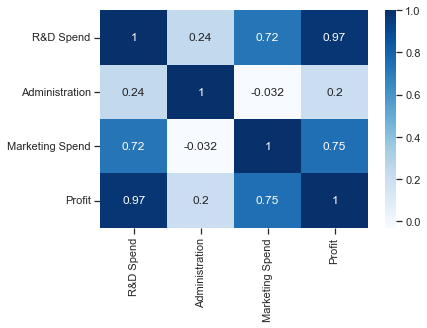

In [515]:
sns.heatmap(c,annot=True,cmap='Blues')
plt.show()

#### Base on Correretion Graph we can say what R&D Spend and Marketing Spends are directly proportional with the Profit

# Scatterplot Matrix

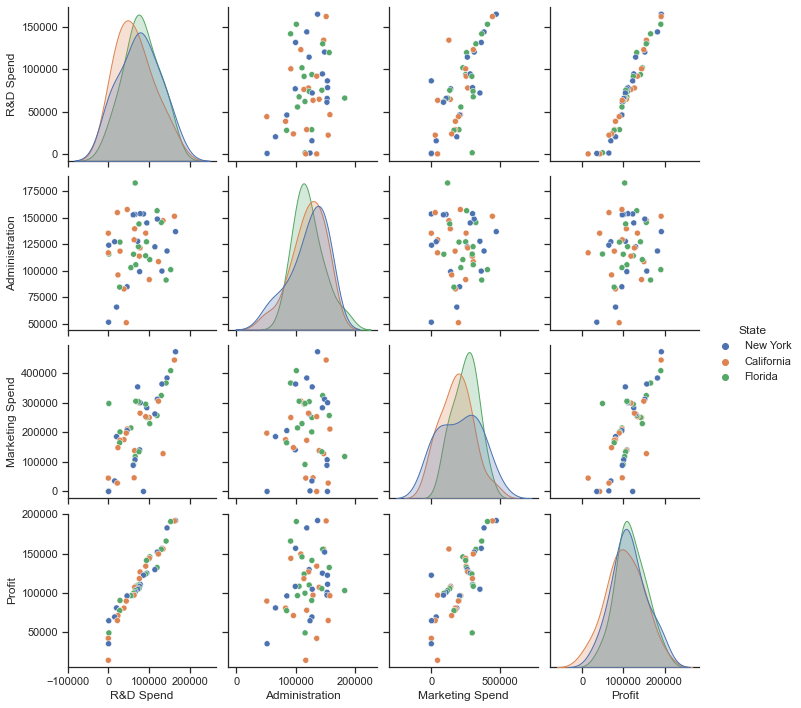

In [516]:

sns.set_theme(style="ticks")
sns.pairplot(dataset, hue="State")

# Create Graphs 


### Relationship with Profit 

<AxesSubplot:title={'center':'Marketing Spend Vs Profit'}, xlabel='Marketing Spend', ylabel='Profit'>

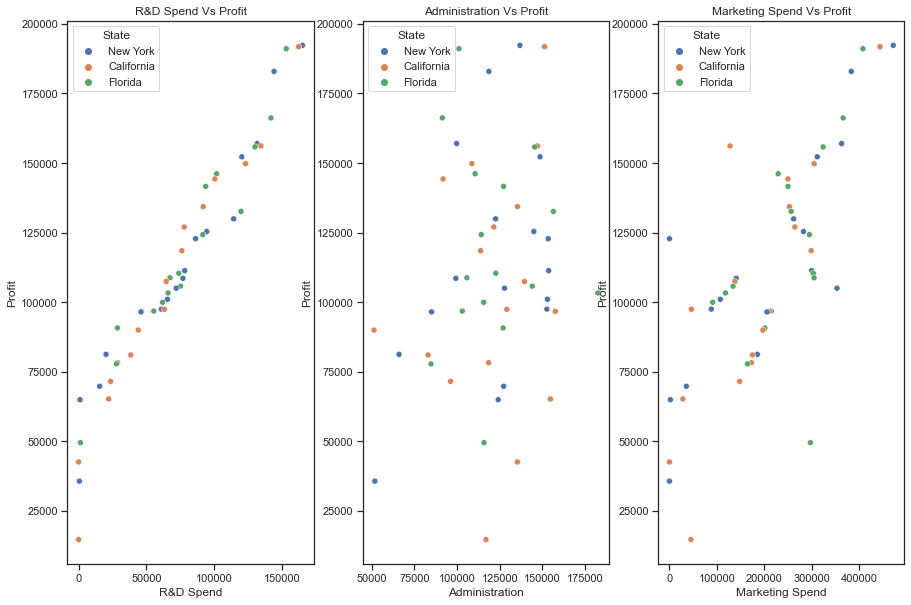

In [517]:
fig, axs = plt.subplots(ncols=3, figsize=(15,10))

axs[0].set_title('R&D Spend Vs Profit')
sns.scatterplot(x = "R&D Spend", y =  "Profit", hue="State", data=dataset, ax=axs[0])

axs[1].set_title('Administration Vs Profit')
sns.scatterplot(x = "Administration", y =  "Profit", hue="State",data=dataset, ax=axs[1])

axs[2].set_title('Marketing Spend Vs Profit')
sns.scatterplot(x = "Marketing Spend", y = "Profit", hue="State", data=dataset, ax=axs[2])

### Profitable States 

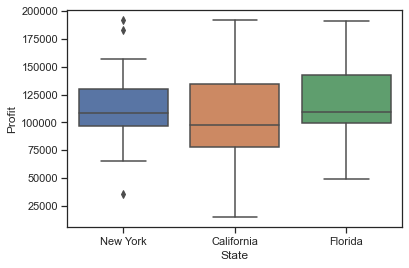

In [518]:

sns.boxplot(x = 'State', y = 'Profit', data = dataset)
plt.show()

# Histogram

array([[<AxesSubplot:title={'center':'R&D Spend'}>,
        <AxesSubplot:title={'center':'Administration'}>],
       [<AxesSubplot:title={'center':'Marketing Spend'}>,
        <AxesSubplot:title={'center':'Profit'}>]], dtype=object)

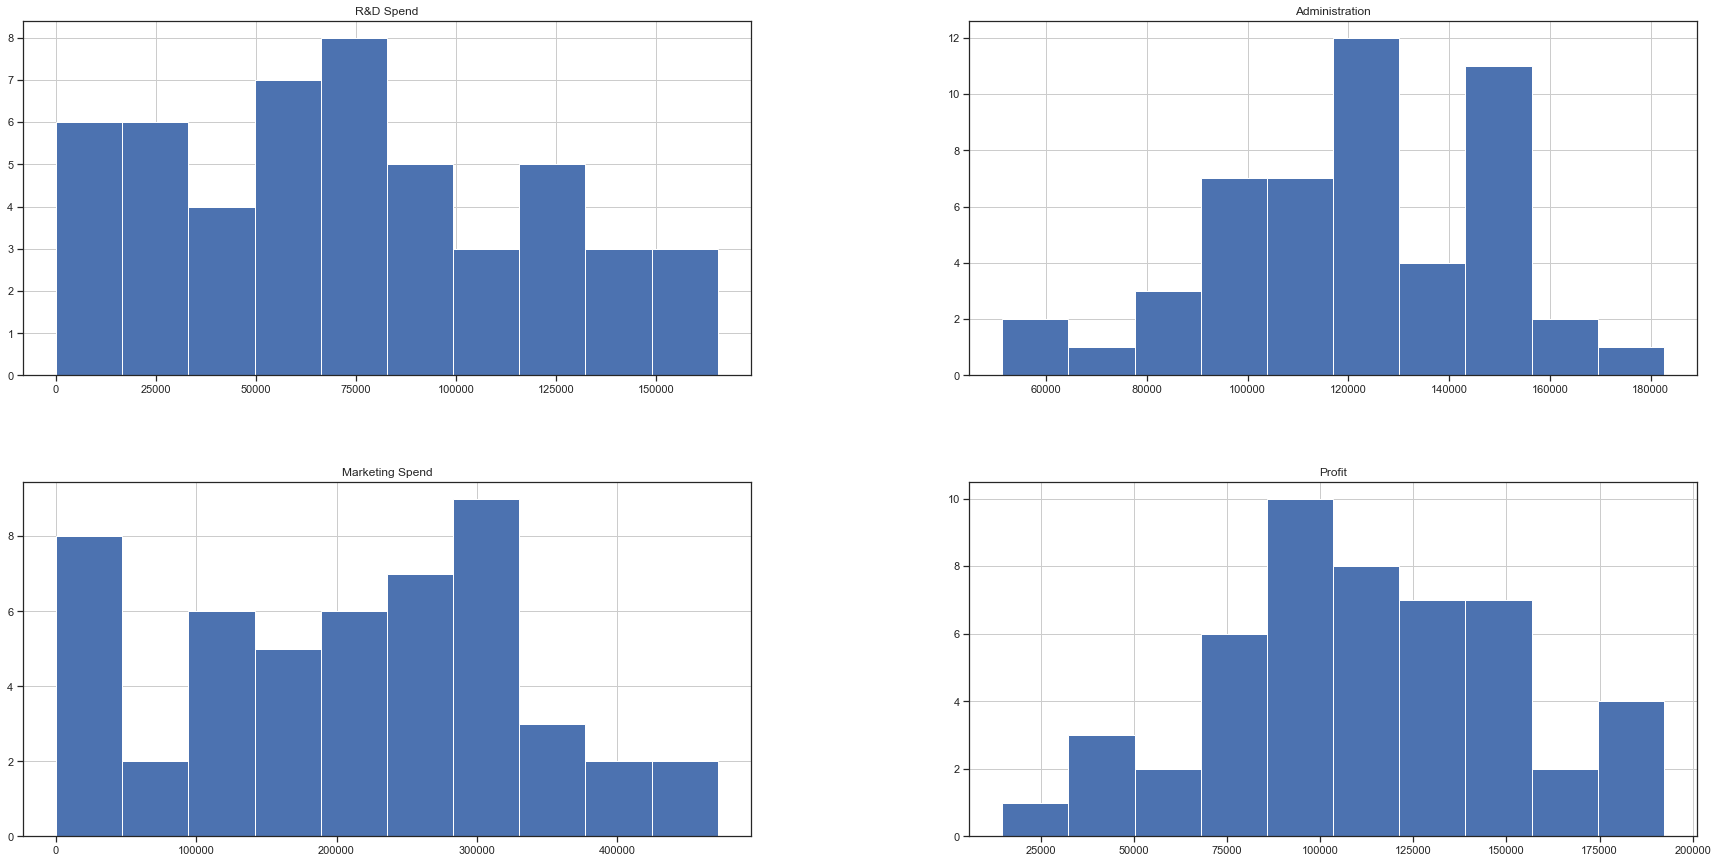

In [519]:

dataset.hist(bins=10, figsize=(30, 15))


# Using sklearn OneHotEncoder


In [520]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

In [521]:
df = dataset
df.State = le.fit_transform(df.State)

In [522]:
ct = ColumnTransformer([('State', OneHotEncoder(), [3])], remainder = 'passthrough')
x = df.iloc[:, :-1].values
x =  ct.fit_transform(x)
x = x[:,1:]

In [523]:
y = df.iloc[:, 4].values
y

array([192261.83, 191792.06, 191050.39, 182901.99, 166187.94, 156991.12,
       156122.51, 155752.6 , 152211.77, 149759.96, 146121.95, 144259.4 ,
       141585.52, 134307.35, 132602.65, 129917.04, 126992.93, 125370.37,
       124266.9 , 122776.86, 118474.03, 111313.02, 110352.25, 108733.99,
       108552.04, 107404.34, 105733.54, 105008.31, 103282.38, 101004.64,
        99937.59,  97483.56,  97427.84,  96778.92,  96712.8 ,  96479.51,
        90708.19,  89949.14,  81229.06,  81005.76,  78239.91,  77798.83,
        71498.49,  69758.98,  65200.33,  64926.08,  49490.75,  42559.73,
        35673.41,  14681.4 ])

# 3D

In [524]:
# Import library to produce a 3D plot
from mpl_toolkits.mplot3d import Axes3D


Text(0.5, 0, 'Profit')

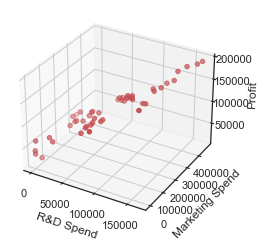

In [525]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')

x1 = dataset["R&D Spend"]
x2 = dataset["Marketing Spend"]

ax.scatter(x1, x2, y, c='r', marker='o')

# Set axis labels
ax.set_xlabel('R&D Spend')
ax.set_ylabel('Marketing Spend')
ax.set_zlabel('Profit')

# Training & Tests


In [526]:
from sklearn.model_selection import train_test_split

#### Splitting Data using `train_test_split`

In [527]:
X_train, X_test, y_train, y_test = train_test_split(x, y, train_size=0.8,random_state=0)


## Training Model

#### Create linear regression model and fit it:

In [528]:
regressor = LinearRegression() # Regression object created
regressor.fit(X_train, y_train) # Training model


LinearRegression()

## Prediction 

In [529]:
y_pred = regressor.predict(X_test) # predicting 
y_pred

array([103015.20159796, 132582.27760816, 132447.73845175,  71976.09851259,
       178537.48221054, 116161.24230163,  67851.69209676,  98791.73374688,
       113969.43533012, 167921.0656955 ])

## Real & Predicted Values


#### Testing scores



In [530]:
testing_data_model_score = regressor.score(X_test, y_test)
print("Model Score/Performance on Testing data",testing_data_model_score)

training_data_model_score = regressor.score(X_train, y_train)
print("Model Score/Performance on Training data",training_data_model_score)

Model Score/Performance on Testing data 0.9347068473282987
Model Score/Performance on Training data 0.9501847627493607


#### Comparing the predicted values and actual values



In [531]:
dfPredict = pd.DataFrame(data={'Predicted value':y_pred.flatten(),'Actual Value':y_test.flatten()})
dfPredict

,Predicted value,Actual Value
0,103015.201598,103282.38
1,132582.277608,144259.40
2,132447.738452,146121.95
3,71976.098513,77798.83
4,178537.482211,191050.39
5,116161.242302,105008.31
6,67851.692097,81229.06
7,98791.733747,97483.56
8,113969.435330,110352.25
9,167921.065696,166187.94


Text(0, 0.5, 'Expected result')

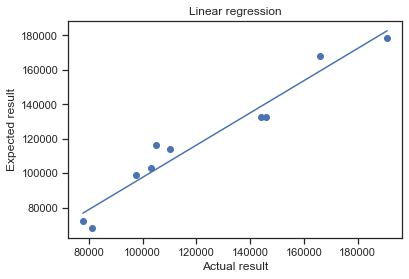

In [532]:
plt.scatter(y_test, y_pred)
plt.plot(np.unique(y_test), np.poly1d(np.polyfit(y_test, y_pred, 1))(np.unique(y_test)))

plt.title('Linear regression')
plt.xlabel('Actual result')
plt.ylabel('Expected result')

### All data

Text(0, 0.5, 'Expected result')

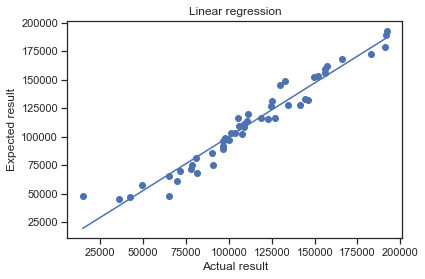

In [533]:
y_pred_all = regressor.predict(x)
plt.scatter(y, y_pred_all)
plt.plot(np.unique(y), np.poly1d(np.polyfit(y, y_pred_all, 1))(np.unique(y)))

plt.title('Linear regression')
plt.xlabel('Actual result')
plt.ylabel('Expected result')

# Just R&D

In [534]:
RD= dataset.iloc[:, 0].values ##Get the R&D score only

RD_train, RD_test, RDy_train, RDy_test = train_test_split(RD, y, test_size = 0.20, random_state=0)

In [535]:
#Training the model
RDregression = LinearRegression()
RDregression.fit(np.array(RD_train).reshape(-1,1), RDy_train)

RD_pred = RDregression.predict(np.array(RD_test).reshape(-1,1))

In [536]:
slope = RDregression.coef_[0]
slope

0.8516227998779371

In [537]:
intercept = RDregression.intercept_
intercept

48416.297661385026

In [538]:
RDscoreTrain = RDregression.score(np.array(RD_train).reshape(-1,1), RDy_train) 
RDscoreTest = RDregression.score(np.array(RD_test).reshape(-1,1), RDy_test) 

print('Train Score: ', RDscoreTrain)
print('Test Score: ', RDscoreTest)


Train Score:  0.9449589778363044
Test Score:  0.9464587607787219


### R&D vs All

In [539]:
print("Train Percentage error is", round(abs(training_data_model_score - RDscoreTrain)*100,2),"%")
print("Test Percentage error is", round(abs(testing_data_model_score - RDscoreTest)*100,2),"%")

Train Percentage error is 0.52 %
Test Percentage error is 1.18 %


### Plot training set and regression line

Text(0, 0.5, 'Profit')

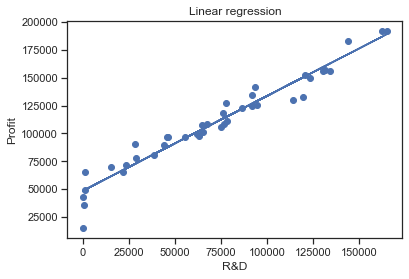

In [540]:

plt.scatter(RD_train, RDy_train)
test_line = [(slope*item + intercept) for item in RD_train]
plt.plot(RD_train, test_line)

plt.title('Linear regression')
plt.xlabel('R&D')
plt.ylabel('Profit')

### Mean Absolute Error:

In [541]:
from sklearn.metrics import mean_absolute_error


mae = mean_absolute_error(y_pred, y_test)
RDmae = mean_absolute_error(RD_pred, RDy_test)

print("Mean Absolute Error is :" ,mae)
print("Mean Absolute Error for R&D is :" ,RDmae)

Mean Absolute Error is : 7514.293659636814
Mean Absolute Error for R&D is : 6772.453280477899


### Root Mean Square Error:

In [542]:
from sklearn.metrics import mean_squared_error
import math
rmse = mean_squared_error(y_test, y_pred)
rmse = math.sqrt(rmse)
RDrmse = mean_squared_error(RDy_test, RD_pred)
RDrmse = math.sqrt(RDrmse)
print("Root Mean Square Error is:", rmse)
print("Root Mean Square Error for R&D is:", RDrmse)


Root Mean Square Error is: 9137.990152791011
Root Mean Square Error for R&D is: 8274.86801822599


# Decision Tree

In [543]:
dataset = pd.read_csv('50_Startups.csv')
dataset = dataset
inputs = dataset.drop('Profit', axis = 'columns')
target = dataset['Profit'].astype(int)
dataset.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [544]:
from sklearn.preprocessing import LabelEncoder

In [545]:
le_RD = LabelEncoder()
le_administration = LabelEncoder()
le_marketing = LabelEncoder()
le_state = LabelEncoder()

inputs['RD_n'] = le_RD.fit_transform(inputs['R&D Spend'])
inputs['administration_n'] = le_RD.fit_transform(inputs['Administration'])
inputs['marketing_n'] = le_RD.fit_transform(inputs['Marketing Spend'])
inputs['state_n'] = le_RD.fit_transform(inputs['State'])
inputs.head()

,R&D Spend,Administration,Marketing Spend,State,RD_n,administration_n,marketing_n,state_n
0,165349.20,136897.80,471784.10,New York,48,34,47,2
1,162597.70,151377.59,443898.53,California,47,41,46,0
2,153441.51,101145.55,407934.54,Florida,46,11,45,1
3,144372.41,118671.85,383199.62,New York,45,22,44,2
4,142107.34,91391.77,366168.42,Florida,44,6,43,1


In [546]:
inputs_n = inputs.drop(['R&D Spend', 'Administration', 'Marketing Spend', 'State'], axis = 'columns')
inputs_n.head()

,RD_n,administration_n,marketing_n,state_n
0,48,34,47,2
1,47,41,46,0
2,46,11,45,1
3,45,22,44,2
4,44,6,43,1


In [547]:
from sklearn import tree

In [548]:
model = tree.DecisionTreeClassifier()

In [549]:
model.fit(inputs_n, target)

DecisionTreeClassifier()

In [562]:
model.score(inputs_n, target)

1.0

In [563]:
treePredict = model.predict(inputs_n)

In [574]:
Treermse = mean_squared_error(target, treePredict)
print("Root Mean Squere Error is", Treermse)

Root Mean Squere Error is 0.0


In [577]:
Treemae = mean_absolute_error(target, treePredict)
print("Mean Absolute Error is", Treemae)

Mean Absolute Error is 0.0
